In [41]:
# Our inital imports to make the font size appropriate and make jupyter notebook as wide as the webpage

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.container { font-size:16px !important; }</style>"))

In [42]:
# Import appropriate packages and set up nice plotting:

import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

# Temporal coherence 

We are going to sketch some waves and then superpose them and numerically calculate the irradiance. Let's try ;) 

This is the sketch of the problem:

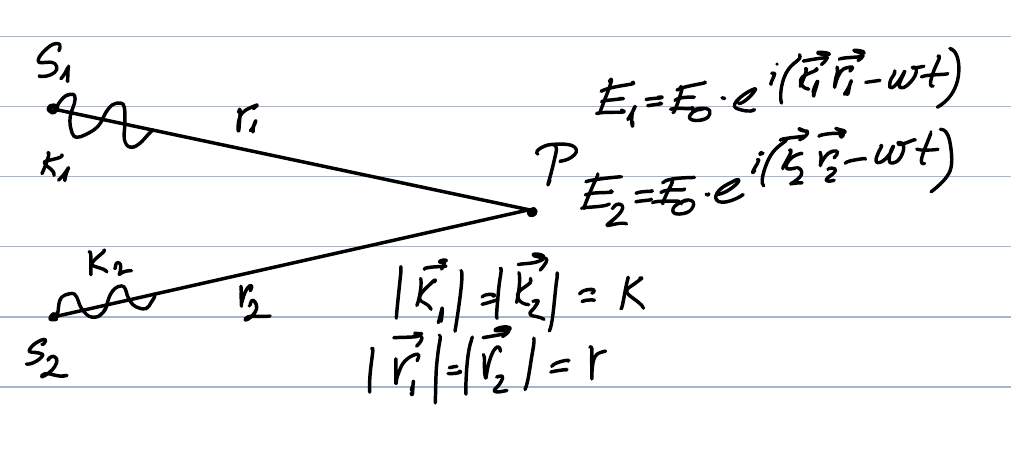

#### To summarize the situation: 

- Two waves are propagating along two directions, they meet at point P. I know I said multiple times that waves exist everywhere in space but this can be something like a wave packet. So it is limited in space (and, as we will see later, in time). 
- Distances the waves are traversing are the same. 
- We will use the same spatial and temporal grid for both waves. 
- We will add electric fields in the end, square them, and average over time to get the measure irradiance. 

Let's go! 

In [43]:
# These are our space and time grids. Spanning from 0 to 100 "units", in 1001 points in total (so step is 0.1)

r = np.linspace(0,100,1001)
t = np.linspace(0,100,1001)

# Wavelength and period in the above given units (don't worry about units so much)
llambda = 1.0
T = 1.0
k = 2.*np.pi / llambda
omega = 2.*np.pi / T

In [44]:
# Let's sketch the harmonic wave in r, t (2D plot)
E = np.cos(k*r[:,None] - omega*t[None,:])

# A moment do discuss this notation. Using "None" extends the shape of the array to the other variables in the expression.
# For example r[:,None] says: first dimension of r stays at it was, add second one and adjust it to the other variables. While t[None,:],
# does the opposite. Overall, the result will be a 2D array with dimensions equal to lenght(r) x length(t)

Text(0, 0.5, 'time')

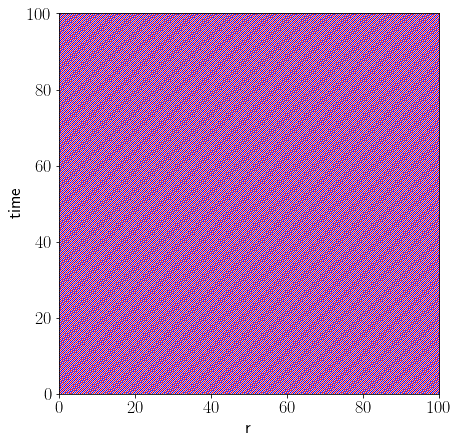

In [45]:
# Let's plot it as a 2D plot:
plt.figure(figsize=[10,7])
plt.imshow(E.T,origin='Lower',extent = [r[0],r[-1],t[0],t[-1]],cmap='bwr')
plt.xlabel("r")
plt.ylabel("time")

(0, 10)

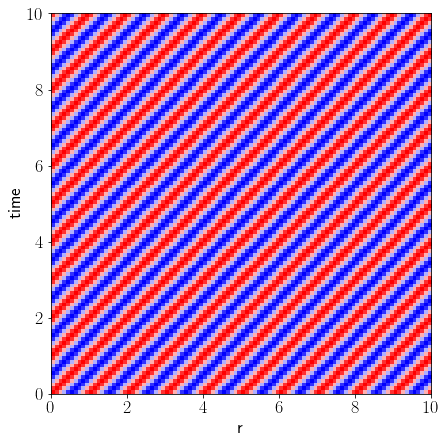

In [46]:
# We can't really see waves there, let's plot a smaller range:
# Let's plot it as a 2D plot:
plt.figure(figsize=[10,7])
plt.imshow(E.T,origin='Lower',extent = [r[0],r[-1],t[0],t[-1]],cmap='bwr')
plt.xlabel("r")
plt.ylabel("time")
plt.xlim([0,10])
plt.ylim([0,10])

#### What do we see here? 

Well, look at t=0, we see maxima and minima in red and blue. Then, as you move up (forward in time), the maxima and minima are moving to the right. Makes sense! 

Now, let's make a wavepacket. That is a wave that looks like a harmonic one but has limited time duration.

In [47]:
# Define the function that calculaes the wave: 

def pseudo_harmonic_wave(r,t,omega,k):
    E = np.cos(k*r[:,None] - omega*t[None,:]) # calculate it everywhere for start:
    v = omega / k # speed of the wave
    # ahead of the wave:
    ahead = np.where((r[:,None] - v*t[None,:]) > 10.)
    E[ahead] = 0.0
    # behind 
    behind = np.where(r[:,None]-v*t[None,:] < 0)
    E[behind] = 0.0
    return E

Text(0, 0.5, 'time')

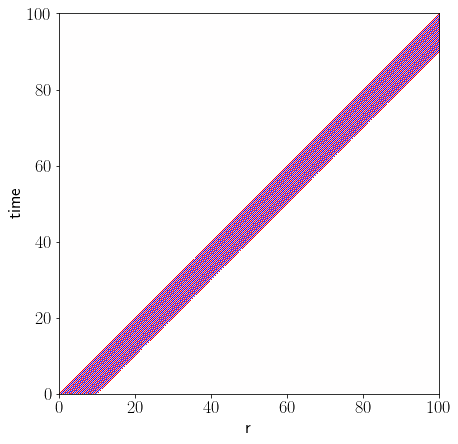

In [48]:
E = pseudo_harmonic_wave(r,t,omega,k)
plt.figure(figsize=[10,7])
plt.imshow(E.T,origin='Lower',extent = [r[0],r[-1],t[0],t[-1]],cmap='bwr')
plt.xlabel("r")
plt.ylabel("time")

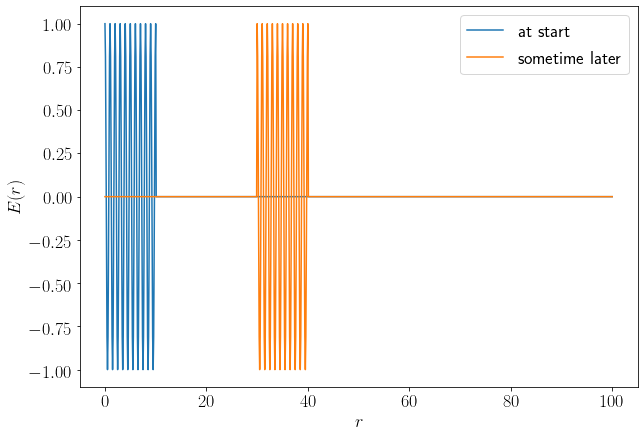

In [49]:
# Let's make sure it looks good when plotted in 1D.
# I will plot wave as E(r) in two instances of time:

plt.figure(figsize=[10,7])
plt.plot(r,E[:,0],label='at start')
plt.plot(r,E[:,300],label= 'sometime later')
plt.xlabel("$r$")
plt.ylabel("$E(r)$")
plt.legend()


Neat! So far it looks good! This is package that travels to the right, cool! :) 

In [50]:
# Let's calculate the irradiance of this wave. How do we do that? Well we temporaly average E^2 in one point. This point is the one where the two 
# beams (waves) meet. 

E_sq = E[-1,:]**2. # index -1 is the last point
t_step = t[1] - t[0] # This is integration step 
t_total = t[-1] - t[0] # This is the total time to divide with

I = np.sum(E_sq) * t_step / t_total
print ("Irradiance is = ", I)

Irradiance is =  0.05100000000000013


This irradiance makes sense. The wave creates the perturbance in the last point only for the 1/10 of the time. Plus there is 1/2 factor for the averaging so irradiance amounts to ~ 0.05.

Now, let's do the superposition between the two waves:

In [51]:
# completely the same
E1 = pseudo_harmonic_wave(r,t,omega,k)
E2 = pseudo_harmonic_wave(r,t,omega,k)

In [52]:
E_sq = (E1[-1,:] + E2[-1,:])**2.0
I_super = np.sum(E_sq) * t_step / t_total
print ("Irradiance for superposition of two waves is = ", I_super)
print ("Irradiance increases by a factor of: ", I_super/I)

Irradiance for superposition of two waves is =  0.20400000000000051
Irradiance increases by a factor of:  4.0


Makes sense! Irradiance increases by a factor of 4! 

But now we want a lot of packets! 
Let's say they are separated by 13, time units (just doing anything greater than 10, but I want to have some separation).

In [53]:
# These are three wave packets :-)
# Three wave packets for each "beam", to be precise. 

E1 = pseudo_harmonic_wave(r,t,omega,k) + pseudo_harmonic_wave(r,t-13,omega,k) + pseudo_harmonic_wave(r,t-26,omega,k)
E2 = pseudo_harmonic_wave(r,t,omega,k) + pseudo_harmonic_wave(r,t-13,omega,k) + pseudo_harmonic_wave(r,t-26,omega,k)

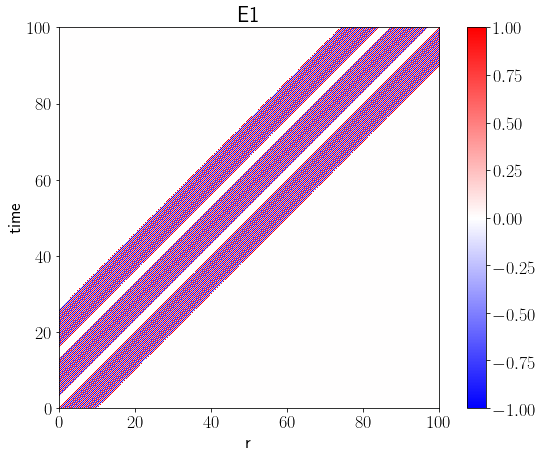

In [54]:
plt.figure(figsize=[10,7])
plt.imshow(E1.T,origin='Lower',extent = [r[0],r[-1],t[0],t[-1]],cmap='bwr')
plt.xlabel("r")
plt.ylabel("time")
plt.title("E1")
plt.colorbar()

Text(0, 0.5, 'Electric field E1')

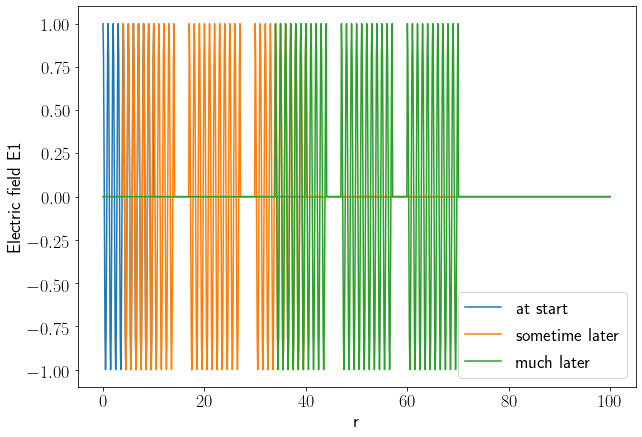

In [55]:
# Let's make sure it looks good when plotted:

plt.figure(figsize=[10,7])
plt.plot(r,E1[:,0],label='at start')
plt.plot(r,E1[:,300],label= 'sometime later')
plt.plot(r,E1[:,600],label= 'much later')

plt.legend()
plt.xlabel("r")
plt.ylabel("Electric field E1")

Makes sense, but we need to extend the time so all the packets can make it to the end of $r$ grid.

In [56]:
r = np.linspace(0,100,1001)
t = np.linspace(0,300,3001) # Now more points for t and larger extent
llambda = 1.0
T = 1.0
k = 2.*np.pi / llambda
omega = 2.*np.pi / T

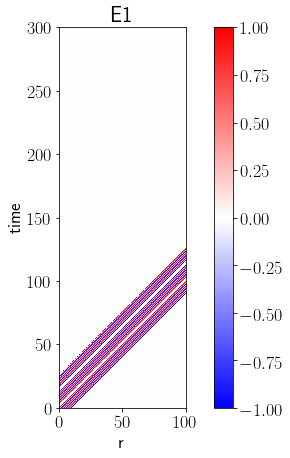

In [58]:
E1 = pseudo_harmonic_wave(r,t,omega,k) + pseudo_harmonic_wave(r,t-13,omega,k) + pseudo_harmonic_wave(r,t-26,omega,k)
E2 = pseudo_harmonic_wave(r,t,omega,k) + pseudo_harmonic_wave(r,t-13,omega,k) + pseudo_harmonic_wave(r,t-26,omega,k)
plt.figure(figsize=[10,7])
plt.imshow(E1.T,origin='Lower',extent = [r[0],r[-1],t[0],t[-1]],cmap='bwr')
plt.xlabel("r")
plt.ylabel("time")
plt.title("E1")
plt.colorbar()

Looks good, most of the time grid is empty, but we do not care about that! We are just looking at the relative changes between one and two waves, not actual values! 

Now let's average in time again:

In [59]:
t_step = t[1] - t[0]
t_total = t[-1] - t[0]

I_single = np.sum(E1[-1,:]**2.0)*t_step/t_total
I_super = np.sum((E1[-1,:]+E2[-1,:])**2.0)*t_step/t_total
print ("Irradiance for one wave = ", I_single)
print ("Irradiance for superposition of two waves is = ", I_super)
print ("Irradiance increases by a factor of: ", I_super/I_single)

Irradiance for one wave =  0.051000000000000136
Irradiance for superposition of two waves is =  0.20400000000000054
Irradiance increases by a factor of:  4.0


### No matter over how large time interval I do this. No matter how many packages are there. These are always going to interfere, and constructively. These two waves are perfectly coherent! 


And now finally introduce the random phase lag between them :)

In [60]:
# It is the same one as before but now there is an additional argument in the parameter

def pseudo_harmonic_wave(r, t, omega, k, phi_0):
    E = np.cos(k*r[:,None] - omega*t[None,:] + phi_0) # calculate it everywhere for start:
    v = omega / k # speed of the wave
    # ahead of the wave:
    ahead = np.where((r[:,None] - v*t[None,:]) > 10.)
    E[ahead] = 0.0
    # behind 
    behind = np.where(r[:,None]-v*t[None,:] < 0)
    E[behind] = 0.0
    return E

In [61]:
N_packets = 20

random_phase = np.random.uniform(-np.pi,np.pi,N_packets)
print (random_phase)

[-1.53259621 -2.90012825 -2.16767947  1.94670891  2.87350872 -1.59407953
 -0.28284449  1.84798911  1.9506118  -0.13840332 -2.63298404  1.71871544
  1.35546998 -0.89291953 -2.22172263 -2.91557427  1.32303661 -2.59671172
 -0.50021681  2.77603183]


In [64]:
# Fist two are in phase but the other ones are not:
E1 = pseudo_harmonic_wave(r,t,omega,k,0)
E2 = pseudo_harmonic_wave(r,t,omega,k,0)
for i in range(1,20):
    E1 += pseudo_harmonic_wave(r,t-i*13,omega,k,0)
    E2 += pseudo_harmonic_wave(r,t-i*13,omega,k,random_phase[i])

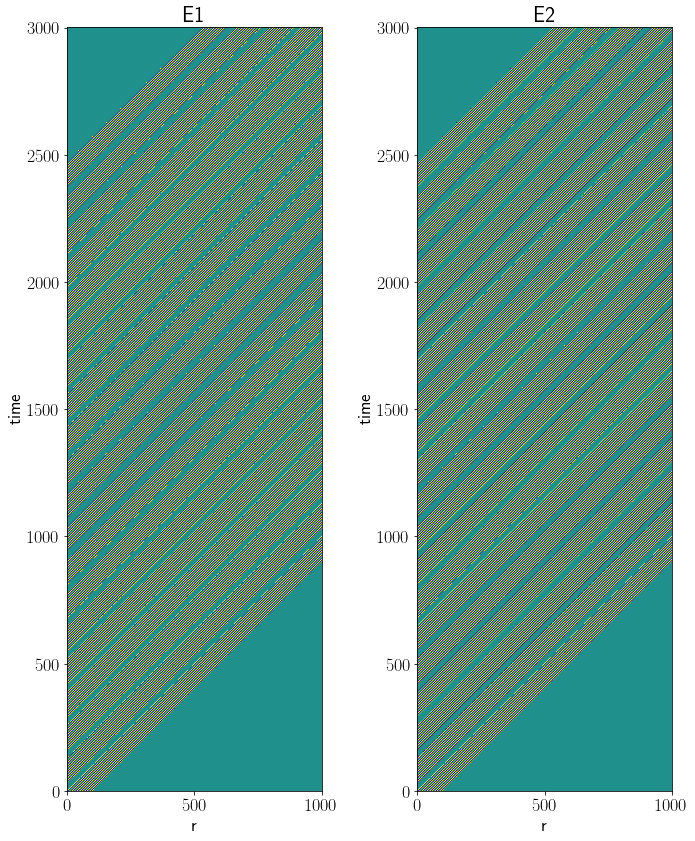

In [65]:
plt.figure(figsize=[10,20])
plt.subplot(121)
plt.imshow(E1.T,origin='Lower')
plt.xlabel("r")
plt.ylabel("time")
plt.title("E1")
plt.subplot(122)
plt.imshow(E2.T,origin='Lower')
plt.xlabel("r")
plt.ylabel("time")
plt.title("E2")
plt.tight_layout()

#plt.colorbar()

This is now a lot of (20) packages, traveling to the right, but they have slightly different phases. 

What happens with the superposition now?

In [66]:
I_single = np.sum(E1[-1,:]**2.0)*t_step/t_total
I_super = np.sum((E1[-1,:]+E2[-1,:])**2.0)*t_step/t_total
print ("Irradiance for one wave = ", I_single)
print ("Irradiance for superposition of two waves is = ", I_super)
print ("Irradiance increases by a factor of: ", I_super/I_single)

Irradiance for one wave =  0.27566666666666395
Irradiance for superposition of two waves is =  0.47051946361638225
Irradiance increases by a factor of:  1.7068420687414276


We see that the superposition has irradiance which is smaller than 4 x the original one! 

Interference now looks something like:

$$I = I_1 + I_2 + 2\sqrt{I_1 I_2} \cos\delta (t) $$

where $\delta(t) = \phi_0(t)$, is random in time and hence these terms cancel for the most part. Actually if we increased the $t$ grid further and had much more packages, we should see it average exactly to 2. 

To visualize it better, here is the time evolution of the electric field in the last grid point, where we are adding the two electric fields:

Text(0, 0.5, 'Superposition of the fields in point P')

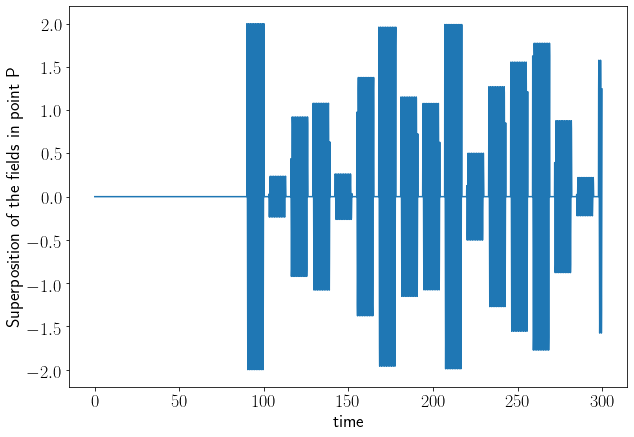

In [67]:
E_P = E1[-1,:] + E2[-1,:]
plt.figure(figsize=[10,7])
plt.plot(t,E_P)
plt.xlabel("time")
plt.ylabel("Superposition of the fields in point P")
#plt.xlim([90,100])

In the first part the electric field is zero as yet none of the packages made it to the last point. In the latter part there are constructive and destructive (and intermediate, or partial) interferences happening, as the phase difference between the two is random.